# 온라인 판매매체별 매출관계분석

- 국가통계포털 https://kosis.kr
- 온라인 쇼핑몰 판매매체별 / 상품군별거래액
- 합계등은 제외하고 선택

In [6]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

from datetime import datetime
from prophet import Prophet
import warnings
import logging

In [16]:
# 차트 스타일
plt.style.use('fivethirtyeight')

# 폰트 설정
d2coding_path = './Desktop/D2Coding-Ver1.3.2-20180524.ttc'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'

# 마이너스 부호가 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [24]:
file_path = 'E:/DataSet/온라인쇼핑몰_판매매체별_상품군별거래액_20241128145607.csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.columns = ['category','date','internet_shopping','mobile_shopping']
data.tail()

,category,date,internet_shopping,mobile_shopping
2134,기타,2024.05,71448,134369
2135,기타,2024.06,63577,115554
2136,기타,2024.07,71215,115314
2137,기타,2024.08 p),60136,120213
2138,기타,2024.09 p),64122,126958


In [25]:
print('수정전')
print(data['date'].tail())
data["date"] = data["date"].map(lambda x: x.rstrip(' p)'))
print('수정후')
print(data['date'].tail())

수정전
2134       2024.05
2135       2024.06
2136       2024.07
2137    2024.08 p)
2138    2024.09 p)
Name: date, dtype: object
수정후
2134    2024.05
2135    2024.06
2136    2024.07
2137    2024.08
2138    2024.09
Name: date, dtype: object


In [26]:
data['date'] = pd.to_datetime(data['date'] , format='%Y.%m')
data.sample(17)

,category,date,internet_shopping,mobile_shopping
2102,기타,2021-09-01,93084,168609
711,패션용품 및 액세서리,2022-01-01,67246,250566
1864,음식서비스,2017-05-01,31139,179426
1312,자동차 및 자동차용품,2017-11-01,39536,50031
1636,여행 및 교통서비스,2021-08-01,188488,599501
1838,이쿠폰서비스,2022-12-01,142893,641890
599,가방,2020-06-01,42383,115008
317,사무·문구,2020-03-01,47164,63087
227,서적,2020-06-01,94184,76807
2017,기타서비스,2022-05-01,77519,118911


In [27]:
ex1_data = data.copy()
obj = ['컴퓨터 및 주변기기','음식서비스','음·식료품','여행 및 교통서비스','패션용품 및 액세서리']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(10)

,category,date,internet_shopping,mobile_shopping
1624,여행 및 교통서비스,2020-08-01,160661,620054
1913,음식서비스,2021-06-01,51466,1968130
1922,음식서비스,2022-03-01,49492,2372920
1644,여행 및 교통서비스,2022-04-01,395581,902337
1113,음·식료품,2024-07-01,646122,2190001
1583,여행 및 교통서비스,2017-03-01,510654,561942
1890,음식서비스,2019-07-01,55648,773268
63,컴퓨터 및 주변기기,2022-04-01,361297,355706
1588,여행 및 교통서비스,2017-08-01,645755,760584
1059,음·식료품,2020-01-01,374501,981130


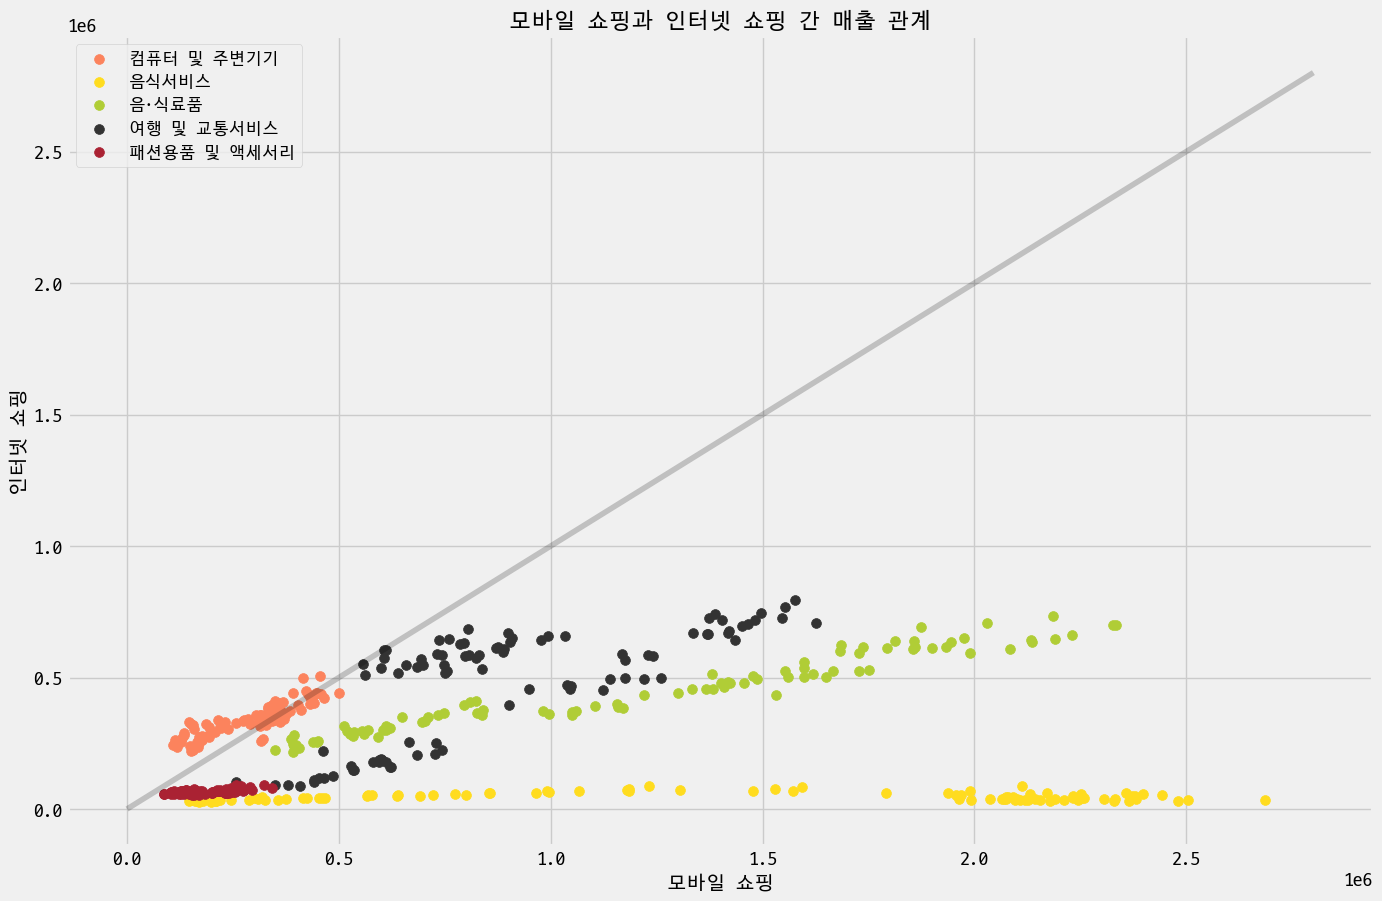

In [36]:
category_colors = {"컴퓨터 및 주변기기":"#FC835D","음식서비스":"#FFDC1F","음·식료품":"#B0CD36","여행 및 교통서비스":"#333333","패션용품 및 액세서리":"#AA2233"}

def colorBy(category):
    return category_colors.get(category, "black")

fig, ax = plt.subplots(figsize=(15,10))

categories = obj

# 산점도 데이터 그리기
for category in categories:
    category_data = ex1_data[ex1_data["category"] == category]
    x_data = category_data["mobile_shopping"]
    y_data = category_data["internet_shopping"]
    ax.scatter(x_data, y_data, s=50, color=colorBy(category), label=category)

# 그래프 제목 / X,Y레이블
ax.set_title("모바일 쇼핑과 인터넷 쇼핑 간 매출 관계", fontsize=16)
ax.set_xlabel("모바일 쇼핑", fontsize =14)
ax.set_ylabel("인터넷 쇼핑", fontsize =14)
ax.plot([0,2800000],[0,2800000],'k-',alpha=0.2)

# 범례
ax.legend(loc="best", fontsize=12)

# 그래프표시
plt.show()


In [29]:
ex2_data = data[data["category"]=="컴퓨터 및 주변기기"].copy()
ex2_data.head()

,category,date,internet_shopping,mobile_shopping
0,컴퓨터 및 주변기기,2017-01-01,288391,133993
1,컴퓨터 및 주변기기,2017-02-01,329143,146200
2,컴퓨터 및 주변기기,2017-03-01,322089,151262
3,컴퓨터 및 주변기기,2017-04-01,251604,116675
4,컴퓨터 및 주변기기,2017-05-01,241871,109053


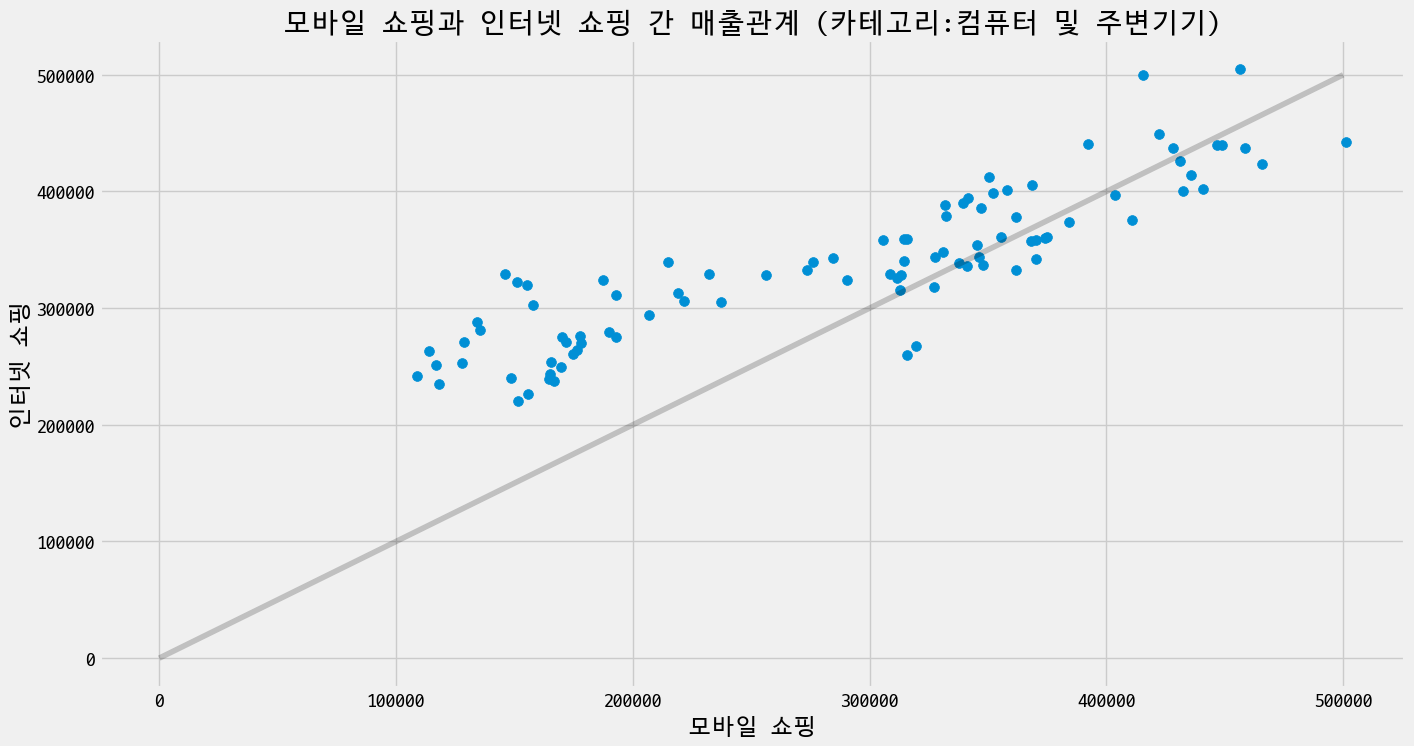

In [33]:
x_data = ex2_data['mobile_shopping']
y_data = ex2_data['internet_shopping']
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x_data, y_data, s=50)
ax.set_title("모바일 쇼핑과 인터넷 쇼핑 간 매출관계 (카테고리:컴퓨터 및 주변기기)")
ax.set_xlabel("모바일 쇼핑")
ax.set_ylabel("인터넷 쇼핑")
ax.plot([0,500000],[0,500000],'k-',alpha=0.2)